In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()

@@@@@@@@@@@@@@@@@

controlling x and y ticks

so, x and y ticks by default are:

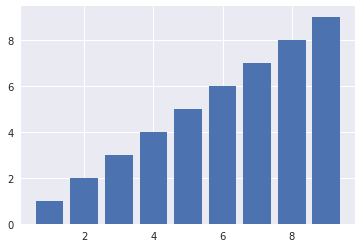

In [3]:
fig = plt.figure()
plt.bar(list(range(1,10)),list(range(1,10)))
plt.show()

using plt.xticks and plt.yticks methods we set number of ticks

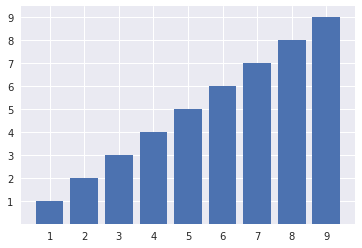

In [4]:
fig0 = plt.figure()
plt.bar(list(range(1,10)),list(range(1,10)))
plt.xticks(list(range(1,10))) # <<< 
plt.yticks(list(range(1,10))) # <<<
plt.show()

@@@@@@@@@@@@@@@@

stacked bar chart

you need "bottom" parameter 
1. this parameter must be the sum of the previous data (which it stands on)
2. perhaps, you'll have to create numpy array to sum the data up

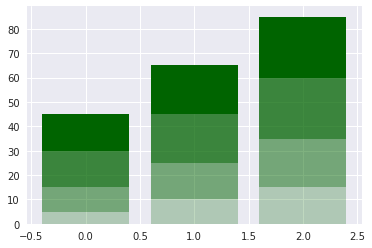

In [5]:
stack_bar = plt.figure()
b = [5,10,15]
b1 = [10, 15, 20]
b2 = [15, 20, 25]
b3 = [20, 25, 30]

plt.bar(list(range(len(b))), b, color="darkgreen", alpha=0.25)
plt.bar(list(range(len(b1))), b1, color="darkgreen", alpha=0.5, bottom=b) # <<<<<<
plt.bar(list(range(len(b2))), b2, color="darkgreen", alpha=0.75, bottom=np.array(b) + np.array(b1))  # <<<<<<
plt.bar(list(range(len(b2))), b2, color="darkgreen", alpha=1.0, bottom=np.array(b) + np.array(b1) + np.array(b2))  # <<<<<<

plt.show()

@@@@@@@@@@@@@@@@@@@@@@@

1. setting x labels
2. setting label rotation
3. setting label font

by the "set_xticks" and "set_xticklabels" methods of the axes obj

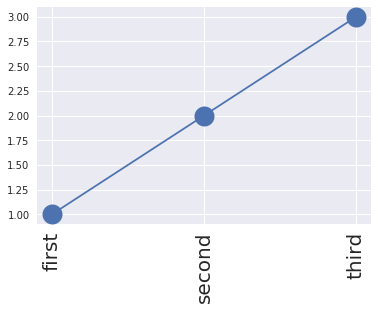

In [6]:
fig1 = plt.figure()
ax = plt.axes()  # <<<< ax obj
 
labels = ["first", "second", "third"] # <<< labels are stored in here

plt.plot(range(1,4), range(1,4), marker="o", ms="20")

ax.set_xticks([1,2,3]) # <<<<< setting numbers of ticks
ax.set_xticklabels(labels, rotation="vertical", fontsize="20") # <<<< setting labels, rotation and font

plt.show()

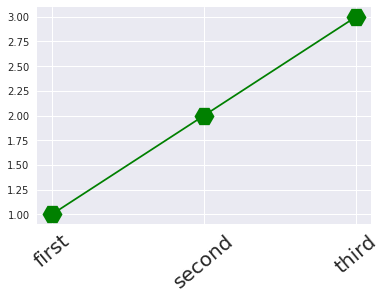

In [7]:
# and a bit easier way 
# with custom rotation
fig2 = plt.figure()
labels = ["first", "second", "third"] # <<< labels are stored in here
plt.plot(range(1,4), range(1,4), marker="H", ms="20", c="green")
plt.xticks([1,2,3], labels, rotation=40, fontsize=20) # <<<<< setting numbers of ticks and labels themselves. arrays must be of the same size
plt.show()

@@@@@@@@@@@@@@@

controlling line width and marker size
1. linewidith parameter in plt.plot()
2. ms is marker size parameter in plt.plot()

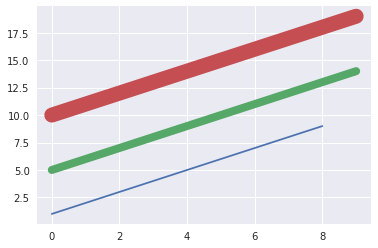

In [8]:
fig2 = plt.figure()

data = np.arange(1,10)
data1 = np.arange(5, 15)
data2 = np.arange(10, 20)

plt.plot(list(range(len(data))), data)
plt.plot(list(range(len(data1))), data1, linewidth=8) # <<<<< 
plt.plot(list(range(len(data2))), data2, linewidth=15) # <<<<<

plt.show()


@@@@@@@@@@@@@@@@@@@@

controlling figure size

add "figsize" parameter to "myfig = plt.figure() call"

"figsize" is a tuple of width and height

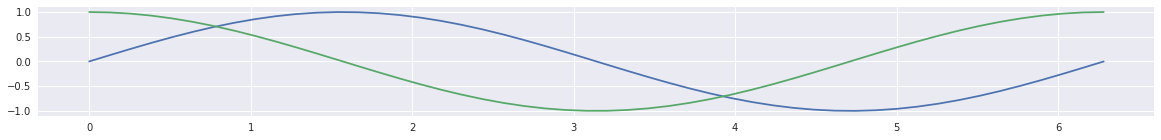

In [9]:
fig = plt.figure(figsize=(20, 2))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()

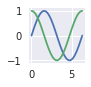

In [10]:
fig = plt.figure(figsize=(1, 1))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()

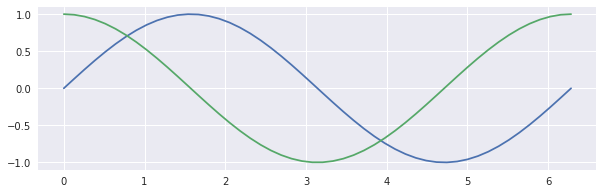

In [11]:
fig = plt.figure(figsize=(10, 3))

x = np.linspace(0, 2 * np.pi)
y = np.sin(x)
y1 = np.cos(x)

plt.plot(x, y)
plt.plot(x, y1)

plt.show()

@@@@@@@@@@@@@@@@@@@@@@@@

creating horizontal bar chart
1. use plt.barh() method
2. to plot sterr use xerr, not yerr


In [12]:
bacteria = [('genus_Faecalibacterium', 6.375431983590924, 3.719869522993805),
 ('genus_Roseburia', 3.955121417108843, 2.483783717487731),
 ('genus_Bacteroides', 2.8371313398244538, 2.453194218608125)]

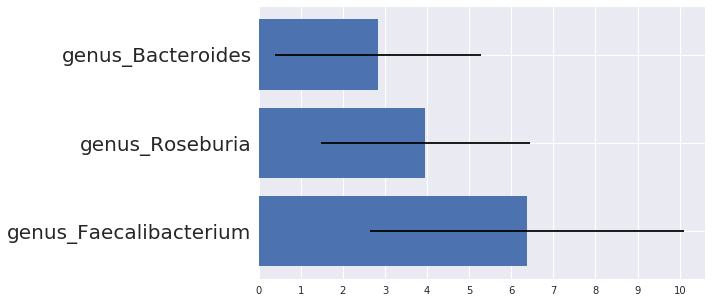

In [13]:
fig_leg = plt.figure(figsize=(8,5))
# preparing some data
datum = [x[1] for x in bacteria]
dev = [x[2] for x in bacteria]
names = [x[0] for x in bacteria]

plt.barh(range(len(datum)), datum, xerr=dev)# <<<<<<<
plt.yticks(range(len(names)), names, fontsize="20")

plt.xticks(range(0,11))
plt.show()



@@@@@@@@@@@@@@@@@@@@@

controlling legend position
1. add "label='name_of_label'" parameter to your plt.plot() call
2. add "bbox_to_anchor" parameter to plt.legend() call
3. "bbox_to_anchor" takes two args in a tuple: lower left corner at position (x,y)

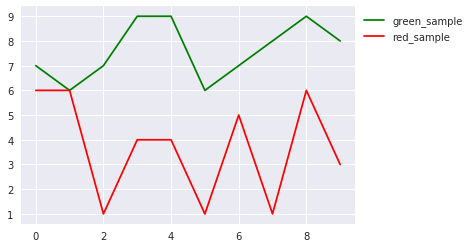

In [14]:
fig_leg = plt.figure()
plt.plot(np.random.randint(6,10, size=10), label="green_sample", c="green")
plt.plot(np.random.randint(1,7, size=10), label="red_sample", c="red")
plt.legend(bbox_to_anchor=(1.0, 1.0)) # <<<<
plt.show()

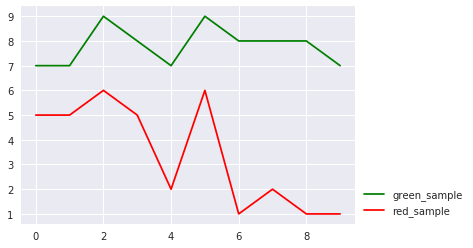

In [15]:
fig_leg = plt.figure()
plt.plot(np.random.randint(6,10, size=10), label="green_sample", c="green")
plt.plot(np.random.randint(1,7, size=10), label="red_sample", c="red")
plt.legend(bbox_to_anchor=(1.0, 0.2)) # <<<<
plt.show()

@@@@@@@@@@@@@@@@@@@@@

controlling dot size
1. ms parameter in plt.plot() call
2. s parameter for plt.scatter() 


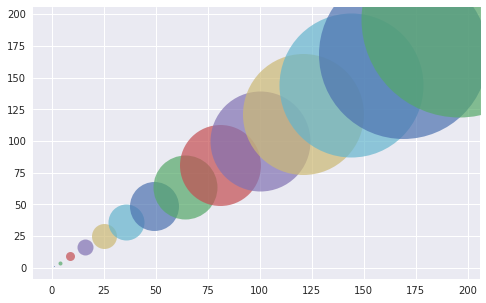

In [16]:
fig_mark = plt.figure(figsize=(8,5))

nums = [x**2 for x in range(1,15)]
size = [x**2 for x in range(1,15)]

counter = 0
for n in nums:
    plt.plot(n, n, marker="o", ms=size[counter], alpha=0.7)
    counter += 1

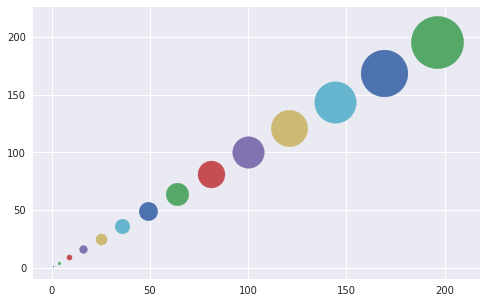

In [17]:
fig_mark_scat = plt.figure(figsize=(8,5))

nums = [x**2 for x in range(1,15)]
size = [x**3 for x in range(1,15)]

counter = 0
for n in nums:
    plt.scatter(n, n, marker="o", s=size[counter])
    counter += 1


@@@@@@@@@@@@@@@@@@@@@@@

controlling transparency of dots

1.alpha parameter in plt.scatter()



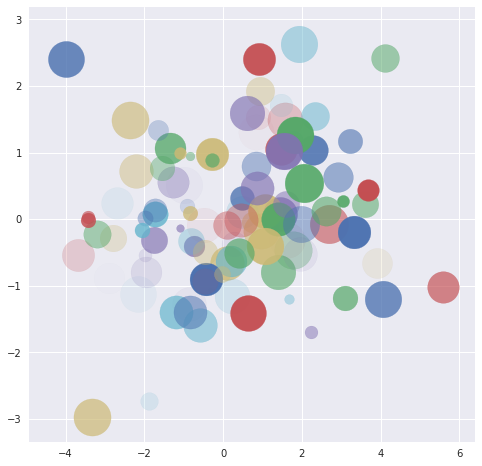

In [18]:
fig_trans = plt.figure(figsize=(8,8))
x = np.random.randn(100)        # 100 random nums of normal distribution with mean 0 and variance 1 
y = np.random.randn(100) * 2    # 100 random nums of normal distribution with mean 0 and variance 1 multiplied by 2
dot_sizes = np.random.choice(1500, size=100) # 100 random numbers [0, 1499]

transparency = np.random.random(100)   # 100 random numbers in the half open interval [0,1), various transparency degrees

for i in range(100):
    plt.scatter(y[i], x[i], s=dot_sizes[i], alpha=transparency[i])

plt.show()

@@@@@@@@@@@@@@@@@@@@@@@

horizontal and vertical lines
1. plt.axhline() and plt.axvline() methods
2. main parameter is x or y coordinate according to the method used


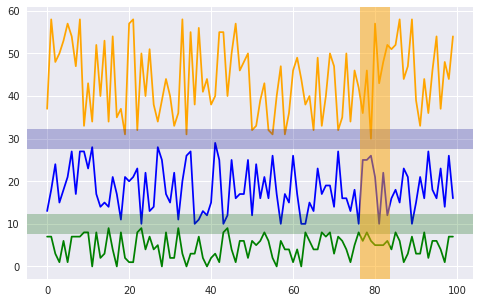

In [19]:
fig_hoz_vert = plt.figure(figsize=(8, 5))

plt.plot(np.random.randint(0,10, size=100),  c="green") # random nums from 0 to 10, 100 numbers
plt.plot(np.random.randint(10,30, size=100),  c="blue")
plt.plot(np.random.randint(30,60, size=100),  c="orange")

plt.axhline(30, lw=20, alpha=0.25, color="darkblue") 
plt.axhline(10, lw=20, alpha=0.25, color="darkgreen")
plt.axvline(80, lw=30, alpha=0.5, color="orange")

plt.show()

@@@@@@@@@@@@@@@@@@@@@

annotation 



plt.annotate('TFM_1', xy=(0, 0.5), xytext=(0, 0.7),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('TFM_2', xy=(1, 0.5), xytext=(1, 0.7),
             arrowprops=dict(facecolor='black', shrink=0.05))
    
    

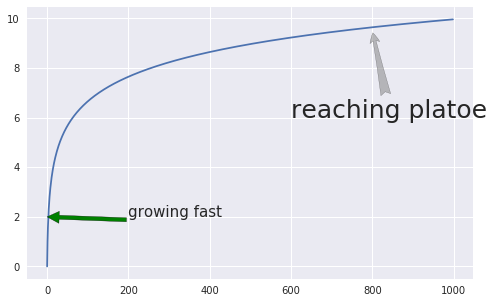

In [50]:
fig_ann = plt.figure(figsize=(8,5))

x = np.log2([x for x in range(1,1000)])

plt.plot(range(0,len(x)), x)

plt.annotate("growing fast", xy=(0, 2), size=15, xytext=(200, 2),
             arrowprops=dict(facecolor="green"))
plt.annotate("reaching platoe", xy=(800, 9.5), size=25, xytext=(600, 6),
             arrowprops=dict(facecolor="grey", arrowstyle="fancy", alpha=0.5))

plt.show()